***Use the cifar10 data and perform image classification using Keras Model. Change 4 hyperparameters in the source code and report the findings***

In [ ]:
#Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

***CIFAR-10 Dataset:***

CIFAR is an acronym that stands for the **Canadian Institute For Advanced Research** and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The collection contains 60,000 32*32 pixel color photos of items from ten different types, including frogs, birds, cats, ships, and so on. The class labels are listed below


1.  Airplane
2.   Automobile

1.   Bird
2.   Cat

1.   Deer
2.   Dog

1.   Frog
2.   Horse

1.   Ship
2.   Truck

These are very small images, much smaller than a typical photograph





















In [ ]:
#Loading cifar10 dataset
from keras.datasets import cifar10
(a_train, b_train),(a_test, b_test) = cifar10.load_data()

Printing the shape and contents of the training and testing Data. There are 50000 training images and 10000 testing images 

In [ ]:
#Printing the shape and contents of the loaded data set
print('Trainig Set: a=%s, b=%s' % (a_train.shape, b_train.shape))
print('Testing Set: a=%s, b=%s' % (a_test.shape, b_test.shape))
print(a_train)
print(b_train)
print(a_test)
print(b_test)


Trainig Set: a=(50000, 32, 32, 3), b=(50000, 1)
Testing Set: a=(10000, 32, 32, 3), b=(10000, 1)
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140

Specifying the number of classes and class names present in the dataset

In [ ]:
#Classes which are there in the data set
classes =['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
No_of_Classes = len(np.unique(b_train))
print(No_of_Classes)

10


Plotting first few images

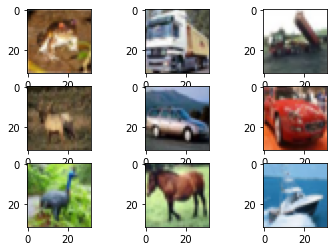

In [ ]:
#plotting the first few images of the dataset
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(a_train[i])
plt.show()


***Normalization***

The pixel values for each image in the dataset are unsigned integers in the range of 0 to 255, or no color to full color.

We are unsure of the ideal method for scaling pixel values for modeling, however we do know that some scaling will be necessary.

Normalizing the pixel values, for example, by rescaling them to the range [0,1], is an excellent place to start. To do so, switch the data type from unsigned integers to floats, then divide the pixel values by the maximum value(255.0).

In [ ]:
#Normalizing the pixel from (0,1) by dividing with 255.0
a_train = a_train.astype("float32")
a_test = a_test.astype("float32")
A_train = a_train/255.0
A_test = a_test/255.0
print(A_train.shape)
print(A_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Printing the data after normalizing

In [ ]:
print(A_train)
print(A_test)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

***One Hot Encoding***

We know there are ten classes and that each class is represented by a single number.

As a result, we can utilize a one-hot encoding for each sample's class element, converting the integer into a 10-element binary vector with a 1 for the class value's index. The **to_categorical()** utility function can help us do this.

In [ ]:
#Performing one hot encoding
from keras.utils import np_utils
B_train = np_utils.to_categorical(b_train)
B_test = np_utils.to_categorical(b_test)

Printing the shape and data after one hot encoding

In [ ]:
print(B_train.shape)
print(B_test.shape)
print(B_train)
print(B_test)

(50000, 10)
(10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


Importing libraries to build and execute model in the keras

In [ ]:
#importing libraries to build and execute model in the keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, Conv1D
from keras.constraints import maxnorm

**Model 1:**

Used Sequential model with 3 Conv2D layers each of size 16, 32, 64 and used 3 MaxPooling2D layers
Used 2 Dense layers. In one dense layer, i have given 128 and other one I have specifies number of classes i.e., 10

Activation functions used are "relu"

In [ ]:
#Building the intial model
No_of_classes = 10
image_width = 32
image_height = 32
Keras_Model = Sequential([
  layers.Conv2D(16, 3, padding='same',input_shape=(32,32, 3),activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(No_of_classes)
])

In [ ]:
#Compiling the model
Keras_Model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
Keras_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

Specifies Epochs as 10 and batch_Size=64

In [ ]:
#Fitting the model to the data
epochs = 10
model = Keras_Model.fit(A_train, B_train, validation_data=(A_test, B_test), epochs=epochs, batch_size=64,verbose=True)

Epoch 1/10
782/782 [==============================] - 17s 10ms/step - loss: 8.0910 - accuracy: 0.1001 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 3/10
782/782 [==============================] - 7s 8ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 4/10
782/782 [==============================] - 7s 8ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 6/10
782/782 [==============================] - 7s 8ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 7/10
782/782 [==============================] - 7s 8ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoc

Plotting training and validation accuracy and loss

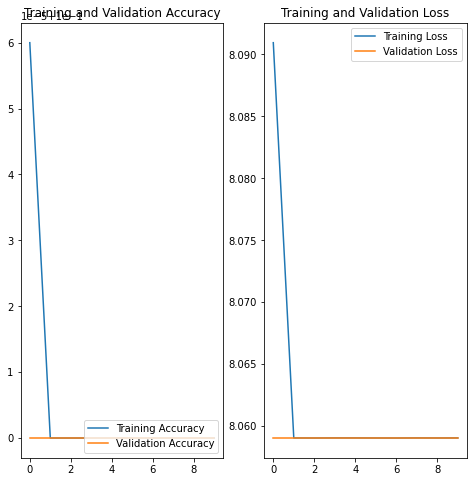

In [ ]:
#Plotting training and validation accuracy and loss
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']

loss=model.history['loss']
val_loss=model.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Calculating the accuracy of the model
Acc = Keras_Model.evaluate(A_test, B_test, verbose=0)
print("Accuracy: %.2f%%"%(Acc[1]*100))

Accuracy: 10.00%


**Model 2(HyperParameter 1):**

Used Sequential model with 3 Conv2D layers each of size 16, 32, 64 and used 3 MaxPooling2D layers Used 2 Dense layers. In one dense layer, I have given 128 and other one I have specifies number of classes i.e., 10

"relu" activation function is used for Conv2D layers and here and I have introduced **"softmax"** activation function in dense layer which is considered as changing a hyperparameter. Softmax activation is used for accurate functioning of dense layer and as we know that it is used when there are multiple layers, so used it for better performance

In [ ]:
#Building second model by changing a hypermeter i.e., by adding softmax activation function
Keras_Model = Sequential([
  layers.Conv2D(16, 3, padding='same',input_shape=(32,32, 3),activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation= 'relu'),
  
  layers.Dense(No_of_classes, activation = "softmax")
])

In [ ]:
#Compiling the model
Keras_Model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fitting the model to the data
model = Keras_Model.fit(A_train, B_train, validation_data=(A_test, B_test), epochs=epochs, batch_size=64,verbose=True)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 1.4882 - accuracy: 0.4592 - val_loss: 1.2460 - val_accuracy: 0.5477
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 1.1238 - accuracy: 0.6029 - val_loss: 1.0617 - val_accuracy: 0.6250
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.9609 - accuracy: 0.6636 - val_loss: 0.9259 - val_accuracy: 0.6765
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.8595 - accuracy: 0.7004 - val_loss: 0.8870 - val_accuracy: 0.6935
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.7854 - accuracy: 0.7274 - val_loss: 0.8964 - val_accuracy: 0.6943
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.7233 - accuracy: 0.7471 - val_loss: 0.8399 - val_accuracy: 0.7148
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6700 - accuracy: 0.7645 - val_loss: 0.8470 - val_accuracy: 0.7083
Epo

[0.45923998951911926, 0.6029000282287598, 0.6636000275611877, 0.700439989566803, 0.7273799777030945, 0.7470600008964539, 0.7645000219345093, 0.781220018863678, 0.7981799840927124, 0.8129199743270874]


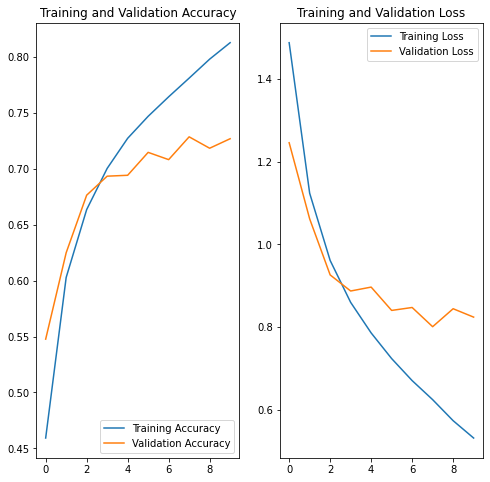

In [ ]:
#Plotting training and validation accuracy and loss
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
print(acc)


loss=model.history['loss']
val_loss=model.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Calculating the accuracy of the second model
Acc = Keras_Model.evaluate(A_test, B_test, verbose=0)
print("Accuracy: %.2f%%"%(Acc[1]*100))

Accuracy: 72.70%


**Model 3(HyperParameter 2):**

Used Sequential model with 3 Conv2D layers each of size 16, 32, 64 and used 3 MaxPooling2D layers Used 2 Dense layers. In one dense layer, I have given 128 and other one I have specifies number of classes i.e., 10

"relu" activation function is used for Conv2D layers and here and I have introduced "softmax" activation function in dense layer in the previous model. In this model, I have added a **Dropout** layer which is considered as a hyperparameter. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

In [ ]:
#Building the third model by changing a hyperparameter i.e., by adding a dropout layer
Keras_Model = Sequential([
  layers.Conv2D(16, 3, padding='same',input_shape=(32,32, 3),activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation= 'relu'),
  layers.Dense(No_of_classes, activation = "softmax"),
  layers.Dropout(0.2)
  
])

In [ ]:
#Compiling the model
Keras_Model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fitting the model to the data
model = Keras_Model.fit(A_train, B_train, validation_data=(A_test, B_test), epochs=epochs, batch_size=64,verbose=True)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 4.3422 - accuracy: 0.3796 - val_loss: 1.3855 - val_accuracy: 0.5033
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 4.0541 - accuracy: 0.4860 - val_loss: 1.1820 - val_accuracy: 0.5759
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 4.0090 - accuracy: 0.5279 - val_loss: 1.0576 - val_accuracy: 0.6283
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 3.8895 - accuracy: 0.5569 - val_loss: 1.0020 - val_accuracy: 0.6541
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 3.8694 - accuracy: 0.5786 - val_loss: 0.9301 - val_accuracy: 0.6802
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 3.7904 - accuracy: 0.5941 - val_loss: 0.9395 - val_accuracy: 0.6766
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 3.7186 - accuracy: 0.6072 - val_loss: 0.9118 - val_accuracy: 0.6878
Epoc

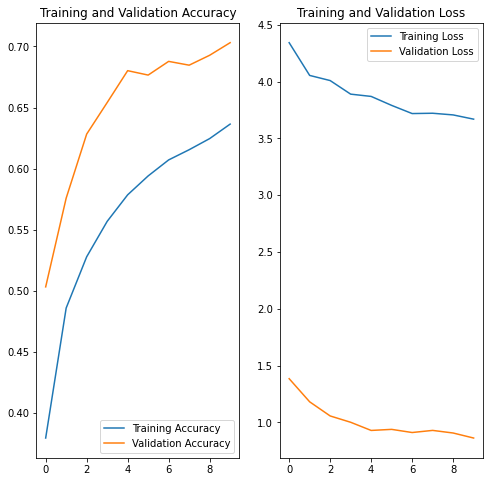

In [ ]:
#Plotting training and validation accuracy and loss
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']

loss=model.history['loss']
val_loss=model.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Calculating the accuracy of the third model
Acc = Keras_Model.evaluate(A_test, B_test, verbose=0)
print("Accuracy: %.2f%%"%(Acc[1]*100))

Accuracy: 70.31%


**Model 4(HyperParameter 3):**

Used Sequential model with 3 Conv2D layers each of size 16, 32, 64 and used 3 MaxPooling2D layers Used 2 Dense layers. In one dense layer, I have given 128 and other one I have specifies number of classes i.e., 10

"relu" activation function is used for Conv2D layers and here and I have introduced "softmax" activation function in dense layer in the previous models. I have added a Dropout layer in the previous model. In this model, I have added multiple Droput layers after each MaxPooling2D layer which is a hyperparameter.
As the dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting, so used it.

In [ ]:
#Building the fourth model by changing a hyperparamter i.e., by adding many dropout layers in between the other layers
Keras_Model = Sequential([
  layers.Conv2D(16, 3, padding='same',input_shape=(32,32, 3),activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Dense(128, activation = 'relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(No_of_classes, activation = "softmax")
  
])

In [ ]:
#Compiling the model
Keras_Model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**HyperParameter4:**

I am increasing number of epochs from 10 to 40 by which accuracy is increased which I considered as my hyperparameter 4

In [ ]:
#Fitting the model to the data
model = Keras_Model.fit(A_train, B_train, validation_data=(A_test, B_test), epochs=40, batch_size=64,verbose=True)

Epoch 1/40
782/782 [==============================] - 10s 11ms/step - loss: 1.6803 - accuracy: 0.3847 - val_loss: 1.4095 - val_accuracy: 0.4894
Epoch 2/40
782/782 [==============================] - 8s 11ms/step - loss: 1.3623 - accuracy: 0.5096 - val_loss: 1.2161 - val_accuracy: 0.5662
Epoch 3/40
782/782 [==============================] - 8s 11ms/step - loss: 1.2331 - accuracy: 0.5597 - val_loss: 1.1253 - val_accuracy: 0.6007
Epoch 4/40
782/782 [==============================] - 8s 11ms/step - loss: 1.1464 - accuracy: 0.5922 - val_loss: 1.0958 - val_accuracy: 0.6118
Epoch 5/40
782/782 [==============================] - 8s 11ms/step - loss: 1.0870 - accuracy: 0.6150 - val_loss: 0.9764 - val_accuracy: 0.6580
Epoch 6/40
782/782 [==============================] - 8s 11ms/step - loss: 1.0427 - accuracy: 0.6294 - val_loss: 0.9845 - val_accuracy: 0.6555
Epoch 7/40
782/782 [==============================] - 8s 11ms/step - loss: 0.9938 - accuracy: 0.6504 - val_loss: 0.8809 - val_accuracy: 0.690

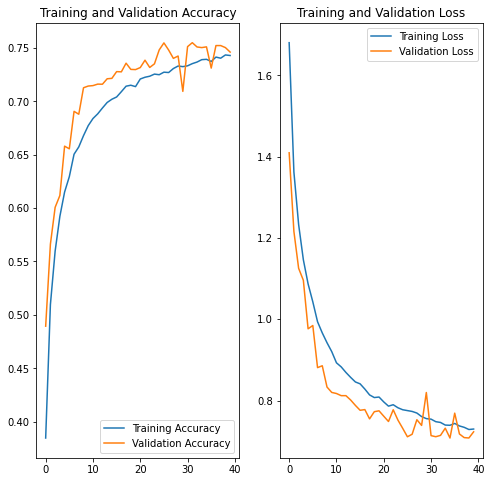

In [ ]:
#Plotting training and validation accuracy and loss
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']

loss=model.history['loss']
val_loss=model.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Calculating accuracy for the model
Acc = Keras_Model.evaluate(A_test, B_test, verbose=0)
print("Accuracy: %.2f%%"%(Acc[1]*100))

Accuracy: 74.61%


Importing libraries for the prediction related work

In [ ]:
#Importing libraries for the prediction related work
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


Bird


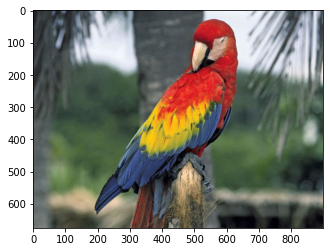

In [73]:
#Giving the bird image from the internet and predicting the output
image1 = image.imread('bird.jpg')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])


Cat


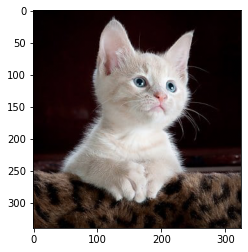

In [74]:
#Giving the cat image from the internet and predicting the output
image1 = image.imread('cat.jpg')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])

Dog


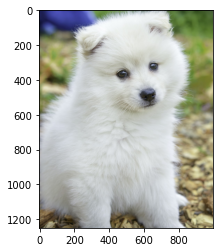

In [75]:
#Giving the dog image from the internet and predicting the output
image1 = image.imread('dog.jpg')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])

Frog


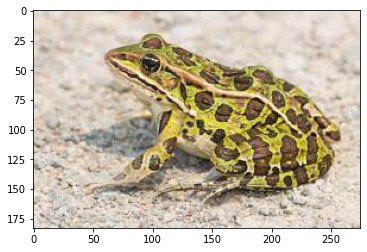

In [76]:
#Giving the frog image from the internet and predicting the output
image1 = image.imread('frog.jpg')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])

Horse


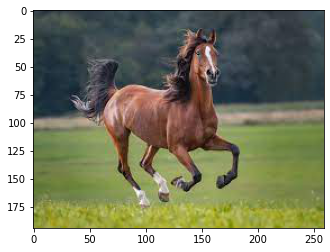

In [77]:
#Giving the horse image from the internet and predicting the output
image1 = image.imread('horse.jpg')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])

Airplane


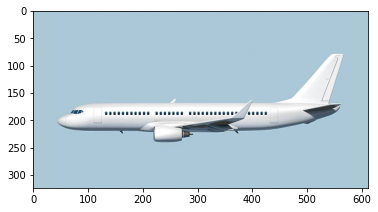

In [78]:
#Giving the airplane image from the internet and predicting the output
image1 = image.imread('airplane.jpg')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])

Deer


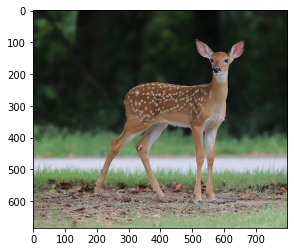

In [79]:
#Giving the deer image from the internet and predicting the output
image1 = image.imread('deer.jpg')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])

Ship


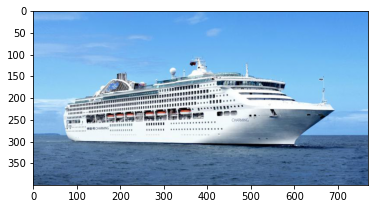

In [80]:
#Giving the ship image from the internet and predicting the output
image1 = image.imread('ship.jpg')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])

Truck


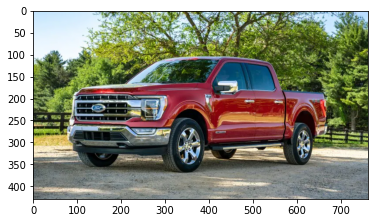

In [81]:
#Giving the truck image from the internet and predicting the output
image1 = image.imread('truck.webp')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])

Automobile


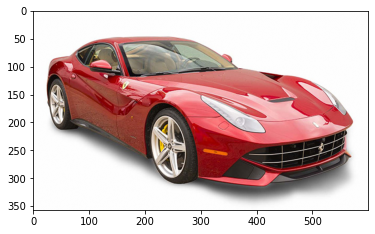

In [82]:
#Giving the automobile image from the internet and predicting the output
image1 = image.imread('automobile.jpg')   
image1 = image1 / 255.0 
image_resize = resize(image1, (32,32,3),) 
m = np.expand_dims(image_resize, axis=0)   
plt.imshow(image1)
keypoints = Keras_Model.predict(m)  
print(classes[np.argmax(keypoints)])